# ~~AI in banking~~
# Logistic regression

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

In [33]:
from sklearn.datasets import make_moons, make_blobs

# Classification

In [34]:
X, y = make_blobs(n_samples=1000,  shuffle=True, centers=2,  cluster_std=1.0, random_state=0)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

In [36]:
y_train

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [38]:
X_train[0:10] #first 10

array([[-1.05441439,  6.36828019],
       [ 3.0709328 ,  1.598705  ],
       [-0.18108518,  3.99149508],
       [ 0.05826531,  4.55628395],
       [-0.20288785,  5.6052154 ],
       [ 0.85153233,  1.31470716],
       [ 1.66608824,  5.60563356],
       [ 2.93639862,  1.93065285],
       [ 1.95028782,  2.26507864],
       [ 2.6145665 , -0.16603193]])

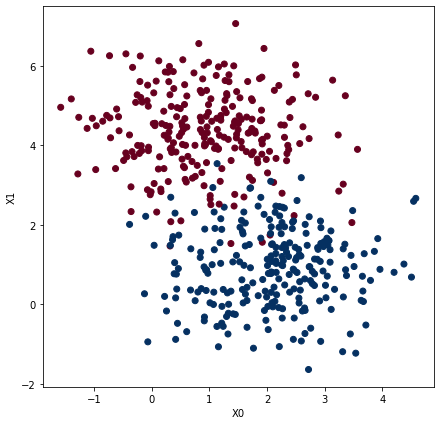

In [39]:
plt.figure(figsize=(7,7))
plt.scatter(X_train[:,0], X_train[:,1], c= y_train, cmap = 'RdBu')
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [40]:
# try linear regression (baseline)

$$ y = w_0 + w_1 x_1 + w_2x_2 + ... +w_dx_d$$

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
reg = LinearRegression()

In [43]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
xdf = pd.DataFrame(X_train)
xdf['y'] = y_train 

In [45]:
xdf

,0,1,y
0,-1.054414,6.368280,0
1,3.070933,1.598705,1
2,-0.181085,3.991495,0
3,0.058265,4.556284,0
4,-0.202888,5.605215,0
...,...,...,...
495,0.443780,4.948843,0
496,2.005206,4.231500,0
497,1.748061,5.127291,0
498,1.912669,3.778147,0


In [46]:
train_prediction = reg.predict(X) 
test_prediction = reg.predict(X_test) 

In [47]:
train_prediction[0:10]

array([ 0.18343333,  0.44697643,  0.46450569,  0.84668384,  0.88645809,
       -0.18538192,  1.01771456,  0.14631291,  0.25554201,  1.07150688])

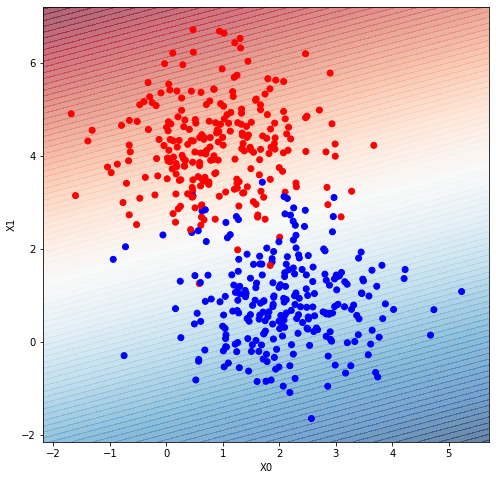

In [48]:
h = .01  # step size in the mesh
x_min, x_max = X_test[:, 0].min() - .5, X_test[:, 0].max() + .5
y_min, y_max = X_test[:, 1].min() - .5, X_test[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.figure(figsize=(8,8))

Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])#[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=0.6, levels=100)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=1)
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

### Problems?

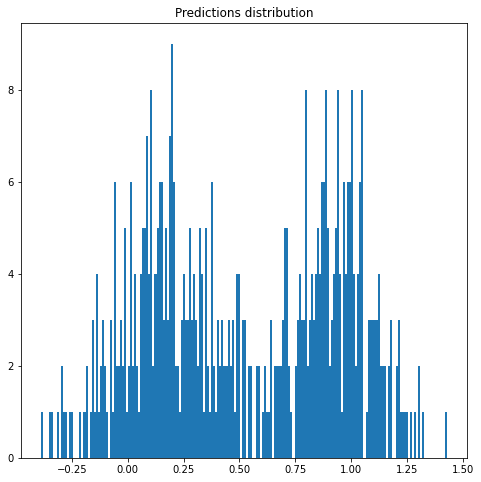

In [49]:
plt.figure(figsize=(8,8))
plt.hist(test_prediction, bins = 200)
plt.title('Predictions distribution')
plt.show()

# Logistic regression

$$ z = w_0 + w_1 x + w_2x_2 + ... +w_dx_d$$
$$ y = \frac{1}{1+e^{-z}}$$ 

y - logistic function (sigmoid)

z also called score

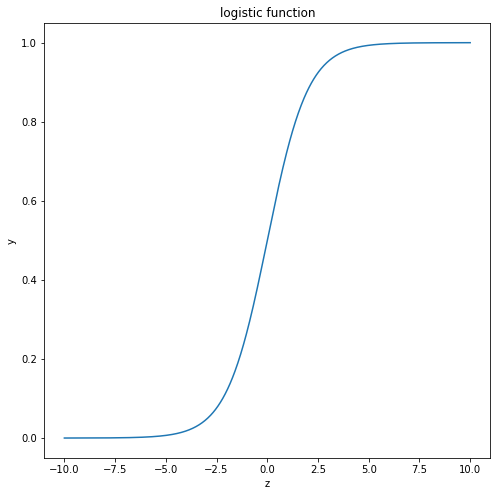

In [50]:
z = np.linspace(-10,10,1000)
y_log = 1/(1+np.exp(-z))

plt.figure(figsize=(8,8))
plt.plot(z,y_log)
plt.title('logistic function')
plt.ylabel('y')
plt.xlabel('z')
plt.show()

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
train_clf_prediction = clf.predict_proba(X_train)[:,0]  #why [:,0]?
test_clf_prediction = clf.predict_proba(X_test)[:,0] 

In [53]:
print(clf.coef_, clf.intercept_)

[[ 0.73492869 -2.7376931 ]] [5.95649282]




y = sigmoid(z)

In [54]:
clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1] 

array([9.99963591e-01, 9.99963858e-01, 9.99964123e-01, ...,
       6.87114398e-05, 6.92182450e-05, 6.97287880e-05])

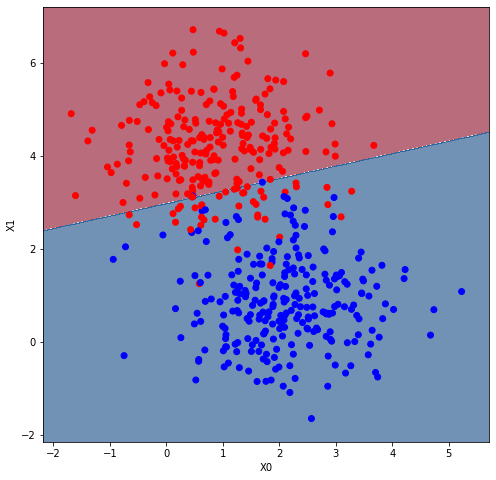

In [55]:
h = .01  # step size in the mesh
x_min, x_max = X_test[:, 0].min() - .5, X_test[:, 0].max() + .5
y_min, y_max = X_test[:, 1].min() - .5, X_test[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])


Z = (clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1] >0.1)*1
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,8))

plt.contourf(xx, yy, Z, cmap=cm, alpha=0.6, levels=10)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=1)
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

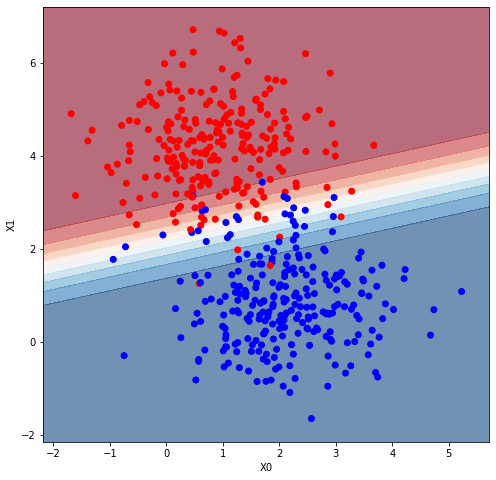

In [56]:
h = .01  # step size in the mesh
x_min, x_max = X_test[:, 0].min() - .5, X_test[:, 0].max() + .5
y_min, y_max = X_test[:, 1].min() - .5, X_test[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.figure(figsize=(8,8))

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]#[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=0.6, levels=10)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=1)
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

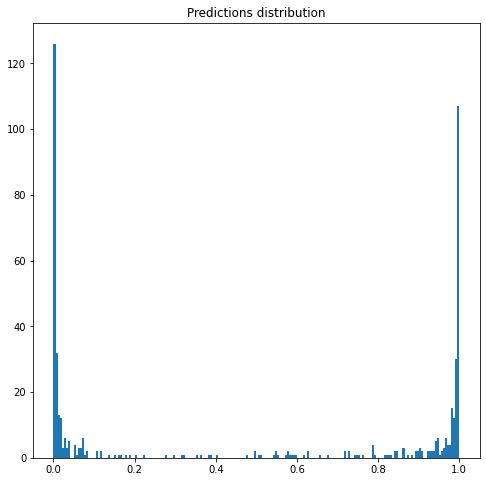

In [57]:
plt.figure(figsize=(8,8))
plt.hist(test_clf_prediction, bins = 200)
plt.title('Predictions distribution')
plt.show()

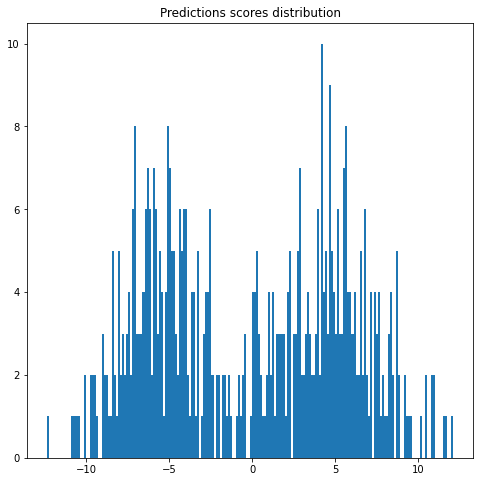

In [58]:
plt.figure(figsize=(8,8))
score = -np.log((1/test_clf_prediction)-1)
plt.hist(score, bins = 200)
plt.title('Predictions scores distribution')
plt.show()

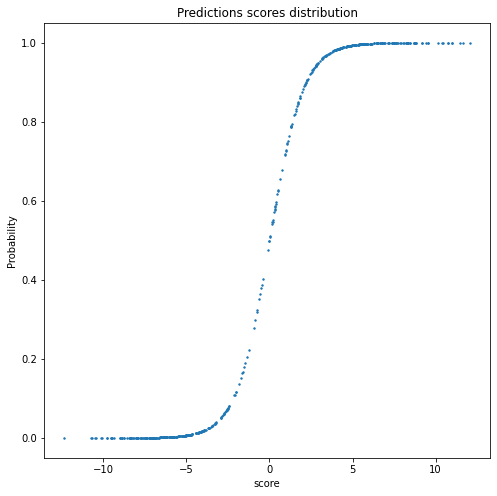

In [59]:
plt.figure(figsize=(8,8))
plt.scatter(score,test_clf_prediction ,s =2)
plt.title('Predictions scores distribution')
plt.ylabel('Probability')
plt.xlabel('score')
plt.show()

# How to measure quality of results? 

$$
y_{true} = 
{
\begin{bmatrix}
y_{1}  \\
y_{2}   \\
⋮ \\
y_{n}
\end{bmatrix}
} = {
\begin{bmatrix}
1  \\
0   \\
⋮ \\
1
\end{bmatrix}
}
$$

$$
\hat{y}_{pred} = 
{
\begin{bmatrix}
\hat{y}_{1}  \\
\hat{y}_{2}   \\
⋮ \\
\hat{y}_{n}
\end{bmatrix}
} = {
\begin{bmatrix}
0  \\
1   \\
⋮ \\
1
\end{bmatrix}
}
$$

![Замещающий текст](https://miro.medium.com/max/512/1*-BkpqhN-5fPicMifDQ0SwA.png)

![Замещающий текст](https://marginalrevolution.com/wp-content/uploads/2014/05/Type-I-and-II-errors1-625x468.jpg)

![Замещающий текст](https://www.questionstar.ru/wp-content/uploads/2020/08/%D0%BE%D1%82%D0%B2%D0%B5%D1%80%D0%B3%D0%BD%D1%83%D1%82%D0%B0.png)

)


In [60]:
y_true = np.array([1,0,1,1,1,0,1])
y_pred = np.array([0,0,1,0,1,0,1])

In [61]:
def TP(y_true,y_pred):
    return np.sum((y_true == 1) & ( y_pred ==1))

In [62]:
TP(y_true,y_pred)

3

In [63]:
def FP(y_true,y_pred):
    pass

def FN(y_true,y_pred):
    pass

def TN(y_true,y_pred):
    pass

### Hypothesis testing

$$ H_0 \text{ - null hypothesis} $$ 

$$ H_1 \text{ - alternative hypothesis} $$ 

![Замещающий текст](https://marginalrevolution.com/wp-content/uploads/2014/05/Type-I-and-II-errors1-625x468.jpg)

### Type I error

The first kind of error is the rejection of a true null hypothesis as the result of a test procedure. This kind of error is called a type I error and is sometimes called an error of the first kind.


### Type II error

The second kind of error is the failure to reject a false null hypothesis as the result of a test procedure. This sort of error is called a type II error and is also referred to as an error of the second kind.

### Confusion matrix

In [64]:
from sklearn.metrics import confusion_matrix
# https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix

In [65]:
print(confusion_matrix(y_true,y_pred))


[[2 0]
 [2 3]]


In [66]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(tn, fp, fn, tp )

2 0 2 3


In [67]:
print(confusion_matrix(y_true,y_pred, normalize='all'))

[[0.28571429 0.        ]
 [0.28571429 0.42857143]]


In [68]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix


In [69]:
def TP_rate(y_true,y_pred):
    pass

def FP_rate(y_true,y_pred):
    pass

def FN_rate(y_true,y_pred):
    pass

def TN_rate(y_true,y_pred):
    pass

In [70]:
# Accuracy

$$\texttt{accuracy}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples}-1} 1(\hat{y}_i = y_i)$$

In [71]:
def accuracy(y_true,y_pred):
    pass



In [72]:
#just use
from sklearn.metrics import accuracy_score

$$\text{precision} = \frac{tp}{tp + fp},$$

In [73]:
def precision(y_true,y_pred):
    pass


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Sensitivity_and_specificity.svg/700px-Sensitivity_and_specificity.svg.png" width="500"/>

In [74]:
# Sensitivity
# Specificity

In [75]:
def sensitivity():
    pass

In [76]:
def specificity():
    pass

In [77]:
#recall 

![Замещающий текст](https://habrastorage.org/web/38e/9d4/892/38e9d4892d9241ea95e1f56e3ef9124c.png)

$$recall = \frac{TP}{TP + FN}$$

In [78]:
def recall(y_true,y_pred):
    pass

#### F score

$$F_\beta = (1 + \beta^2) \frac{\text{precision} \times \text{recall}}{\beta^2 \text{precision} + \text{recall}}$$

# ROC-AUC

In [79]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from scipy import interp
from sklearn.metrics import roc_auc_score



In [80]:

X, y = make_blobs(n_samples=1000,  shuffle=True, centers=2,  cluster_std=1.0, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)
classifier = LogisticRegression()
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)[:,1]

In [81]:
y_score[0:10]

array([9.32391653e-01, 1.72353743e-04, 7.78689310e-01, 9.93789338e-01,
       9.99986989e-01, 9.99446493e-01, 1.05554101e-01, 8.69188530e-01,
       9.99816524e-01, 1.19059704e-02])

In [82]:
ydf = pd.DataFrame(y_train)
ydf.columns = ['true']
ydf['score'] = y_score


In [83]:
ydf = ydf.sort_values(by = 'score').reset_index(drop=True)

In [84]:
ydf

,true,score
0,1,0.000002
1,1,0.000003
2,0,0.000003
3,0,0.000003
4,1,0.000005
...,...,...
495,0,0.999983
496,0,0.999985
497,1,0.999987
498,0,0.999989


In [85]:
tr =0.999998	
ydf['prediction'] = (ydf['score']>=tr)*1
ydf[ydf['score']<=tr]


,true,score,prediction
0,1,0.000002,0
1,1,0.000003,0
2,0,0.000003,0
3,0,0.000003,0
4,1,0.000005,0
...,...,...,...
495,0,0.999983,0
496,0,0.999985,0
497,1,0.999987,0
498,0,0.999989,0


In [86]:
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

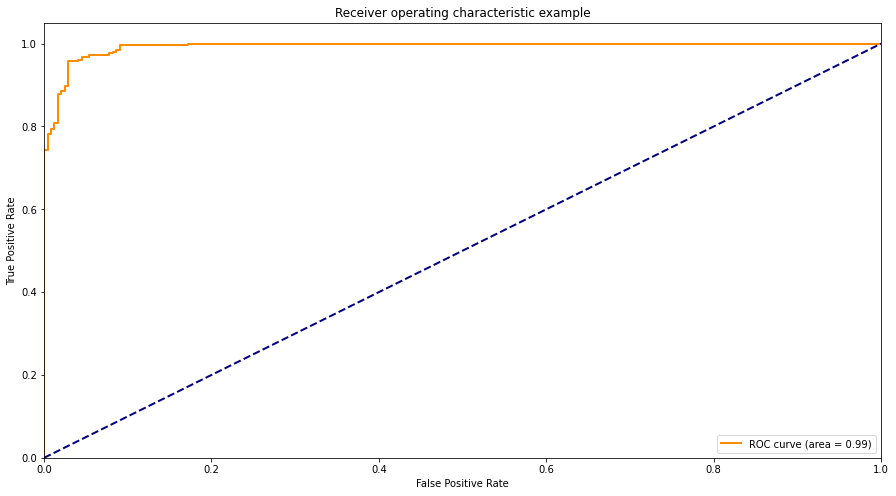

In [87]:
plt.figure(figsize=(15,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [89]:
def roc_auc():
    pass 

In [90]:
# compare two 

# Log-loss

$$\text{logloss}(\cdot) = \frac{-1}{N}\sum_i^N \sum_j^M y_{ij} \log{p_{ij}}$$


$$\text{logloss} = \frac{-1}{N}\sum_i^N  (y*p + (1-y)(1-p))  $$

In [ ]:
def logloss(y_true, y_pred):
    pass

![Замещающий текст](https://i.imgur.com/N1EzTiq.png)

# Regularization

$$Q(w) = \frac{1}{2}  \sum_{n=1}^{N} (y_n - w^Tx_n)^2 $$

$$Q(w) = \frac{1}{2}  \sum_{n=1}^{N} (y_n - w^Tx_n)^2 +    \frac{\lambda}{2}  w^Tw $$

$$\frac{1}{2}  \sum_{n=1}^{N} (y_n - w^Tx_n)^2  \text{ -    data-dependent error} $$

$$\frac{\lambda}{2}  w^Tw \text{ -     regularization  error} $$
$$\lambda \text{ -     regularization  term} $$


 $$ \frac{\lambda}{2}  \sum_{j=1}^{M} |w|^q ,\text{ q=1,2,...    regularization in general} $$

In [92]:
?LogisticRegression

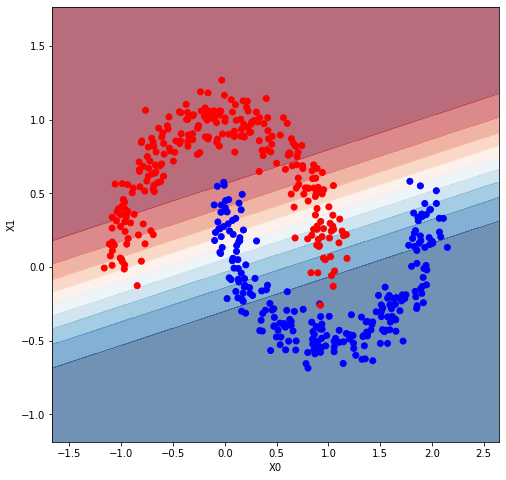

In [91]:
X, y = make_moons(n_samples=1000,  shuffle=True, noise = 0.1,  random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

reg = LogisticRegression(penalty='l1')
reg.fit(X,y)
train_prediction = reg.predict_proba(X)[:,1] 
test_prediction = reg.predict_proba(X_test) [:,1] 

h = .01  # step size in the mesh
x_min, x_max = X_test[:, 0].min() - .5, X_test[:, 0].max() + .5
y_min, y_max = X_test[:, 1].min() - .5, X_test[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.figure(figsize=(8,8))

Z = reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=0.6, levels=10)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=1)
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

# How to make multi class regression?

In [ ]:
# ???

In [ ]:
#[0, 1, 2 , 0, 1, 2]

0 - 0.7
1 - 0.5
2 - 0.6

# Why feature generation is important?

In [93]:
from sklearn.datasets import make_circles

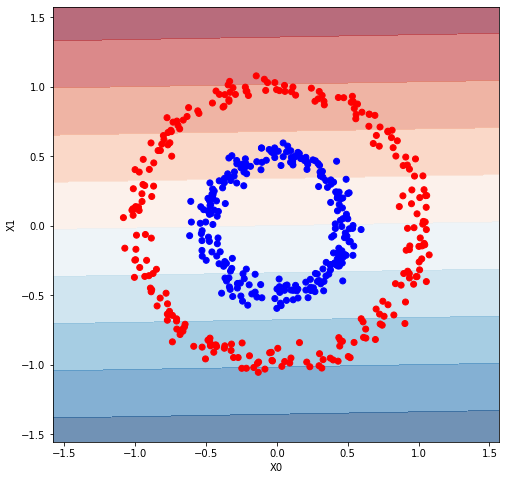

In [94]:
X, y = make_circles(n_samples=1000, factor=.5,
                                      noise=.05)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

reg = LogisticRegression(penalty='l2')
reg.fit(X,y)
train_prediction = reg.predict_proba(X)[:,1] 
test_prediction = reg.predict_proba(X_test) [:,1] 

h = .01  # step size in the mesh
x_min, x_max = X_test[:, 0].min() - .5, X_test[:, 0].max() + .5
y_min, y_max = X_test[:, 1].min() - .5, X_test[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.figure(figsize=(8,8))

Z = reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=0.6, levels=10)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=1)
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [95]:
roc_auc_score(y_test, test_prediction)

0.4829655470387736

In [96]:
X, y = make_circles(n_samples=1000, factor=.5,
                                      noise=.05)

In [97]:
X = pd.DataFrame(X)

In [98]:
X['r'] = np.sqrt(X[0]**2 + X[1]**2)

In [99]:
X['p'] = np.arctan2(X[1], X[0])

In [100]:
X = np.array(X[['r','p']] )

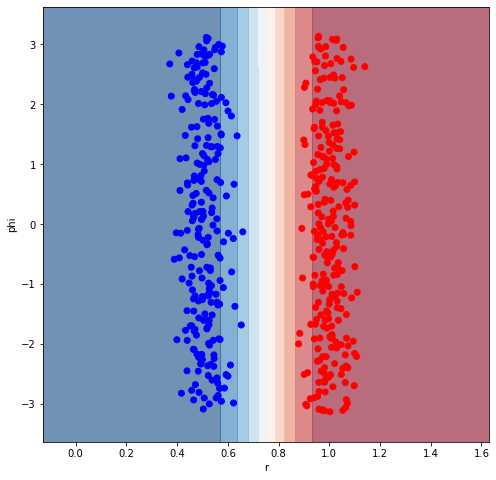

In [101]:



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

reg = LogisticRegression(penalty='l2')

reg.fit(X,y)
train_prediction = reg.predict_proba(X)[:,1] 
test_prediction = reg.predict_proba(X_test) [:,1] 

h = .01  # step size in the mesh
x_min, x_max = X_test[:, 0].min() - .5, X_test[:, 0].max() + .5
y_min, y_max = X_test[:, 1].min() - .5, X_test[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.figure(figsize=(8,8))

Z = reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=0.6, levels=10)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=1)
plt.xlabel('r')
plt.ylabel('phi')
plt.show()

In [102]:
roc_auc_score(y_test, test_prediction)

1.0



<img src="https://miro.medium.com/max/972/1*SwXHlCzh-d9UqHOglp3vcA.png " width="500"/>